---
execute:
  cache: false
  eval: true
  echo: true
  warning: false
---


# Sequential Parameter Optimization: Using `scipy` Optimizers {#sec-scipy-optimizers}

As a default optimizer, `spotPython` uses `differential_evolution` from the `scipy.optimize` package. Alternatively, any other optimizer from the `scipy.optimize` package can be used. This chapter describes how different optimizers from the `scipy optimize` package can be used on the surrogate.
The optimization algorithms are available from [https://docs.scipy.org/doc/scipy/reference/optimize.html](https://docs.scipy.org/doc/scipy/reference/optimize.html)


In [1]:
#| label: 04_imports
import numpy as np
from math import inf
from spotPython.fun.objectivefunctions import analytical
from spotPython.spot import spot
from scipy.optimize import shgo
from scipy.optimize import direct
from scipy.optimize import differential_evolution
from scipy.optimize import dual_annealing
from scipy.optimize import basinhopping
from spotPython.utils.init import fun_control_init, design_control_init, optimizer_control_init, surrogate_control_init

## The Objective Function Branin

The `spotPython` package provides several classes of objective functions. We will use an analytical objective function, i.e., a function that can be described by a (closed) formula. Here we will use the Branin function. The 2-dim Branin function is
$$
y = a  (x_2 - b  x_1^2 + c  x_1 - r) ^2 + s  (1 - t)  \cos(x_1) + s,
$$
where values of $a$, $b$, $c$, $r$, $s$ and $t$ are: $a = 1$, $b = 5.1 / (4\pi^2)$, $c = 5 / \pi$, $r = 6$, $s = 10$ and $t = 1 / (8\pi)$.

It has three global minima: $f(x) = 0.397887$ at $(-\pi, 12.275)$, $(\pi, 2.275)$, and $(9.42478, 2.475)$.

Input Domain: This function is usually evaluated on the square  $x_1 \in  [-5, 10] \times x_2 \in  [0, 15]$.


In [2]:
#| label: 04_objective_function
from spotPython.fun.objectivefunctions import analytical
lower = np.array([-5,-0])
upper = np.array([10,15])
fun = analytical(seed=123).fun_branin

## The Optimizer{#sec-optimizer}

Differential Evolution (DE) from the `scikit.optimize` package, see [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution) is the default optimizer for the search on the surrogate.
Other optimiers that are available in `spotPython`, see [https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization](https://docs.scipy.org/doc/scipy/reference/optimize.html#global-optimization).

  * `dual_annealing`
  * `direct`
  * `shgo`
  * `basinhopping`

These optimizers can be selected as follows:


In [3]:
#| label: 04_optimizer_control
#| eval: false
from scipy.optimize import differential_evolution
optimizer = differential_evolution

As noted above, we will use `differential_evolution`. The optimizer can use `1000` evaluations. This value will be passed to the `differential_evolution` method, which has the argument `maxiter` (int). It defines the maximum number of generations over which the entire differential evolution population is evolved, see [https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution)


:::{.callout-note}
#### TensorBoard

Similar to the one-dimensional case, which is discussed in @sec-visualizing-tensorboard-01, we can use TensorBoard to monitor the progress of the optimization. We will use a similar code, only the prefix is different:


In [4]:
fun_control=fun_control_init(
                    lower = lower,
                    upper = upper,
                    fun_evals = 20,
                    PREFIX = "04_DE_"
                    )
surrogate_control=surrogate_control_init(
                    n_theta=len(lower))

Seed set to 123


Created spot_tensorboard_path: runs/spot_logs/04_DE__bartz10_2024-06-28_16-03-34 for SummaryWriter()


:::


In [5]:
spot_de = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    surrogate_control=surrogate_control)
spot_de.run()

spotPython tuning: 3.8004644561334935 [######----] 55.00% 


spotPython tuning: 3.8004644561334935 [######----] 60.00% 


spotPython tuning: 3.1590379739505225 [######----] 65.00% 


spotPython tuning: 3.1345599589760926 [#######---] 70.00% 


spotPython tuning: 2.8987595919440583 [########--] 75.00% 


spotPython tuning: 0.4124604824941809 [########--] 80.00% 


spotPython tuning: 0.40391426855740775 [########--] 85.00% 


spotPython tuning: 0.3990718447916741 [#########-] 90.00% 


spotPython tuning: 0.3990718447916741 [##########] 95.00% 


spotPython tuning: 0.3990718447916741 [##########] 100.00% Done...



### TensorBoard

If the `prefix` argument in `fun_control_init()`is not `None` (as above, where the `prefix` was set to `04_DE_`) , we can start TensorBoard in the background with the following command:


```{raw}
tensorboard --logdir="./runs"
```


We can access the TensorBoard web server with the following URL:


```{raw}
http://localhost:6006/
```


The TensorBoard plot illustrates how `spotPython` can be used as a microscope for the internal mechanisms of the surrogate-based optimization process. Here, one important parameter, the learning rate $\theta$ of the Kriging surrogate is plotted against the number of optimization steps.

![TensorBoard visualization of the spotPython optimization process and the surrogate model.](figures_static/05_tensorboard_01.png){width="100%"}


## Print the Results


In [6]:
spot_de.print_results()

min y: 0.3990718447916741
x0: 3.149600915888656
x1: 2.2983701643039107


[['x0', 3.149600915888656], ['x1', 2.2983701643039107]]

## Show the Progress


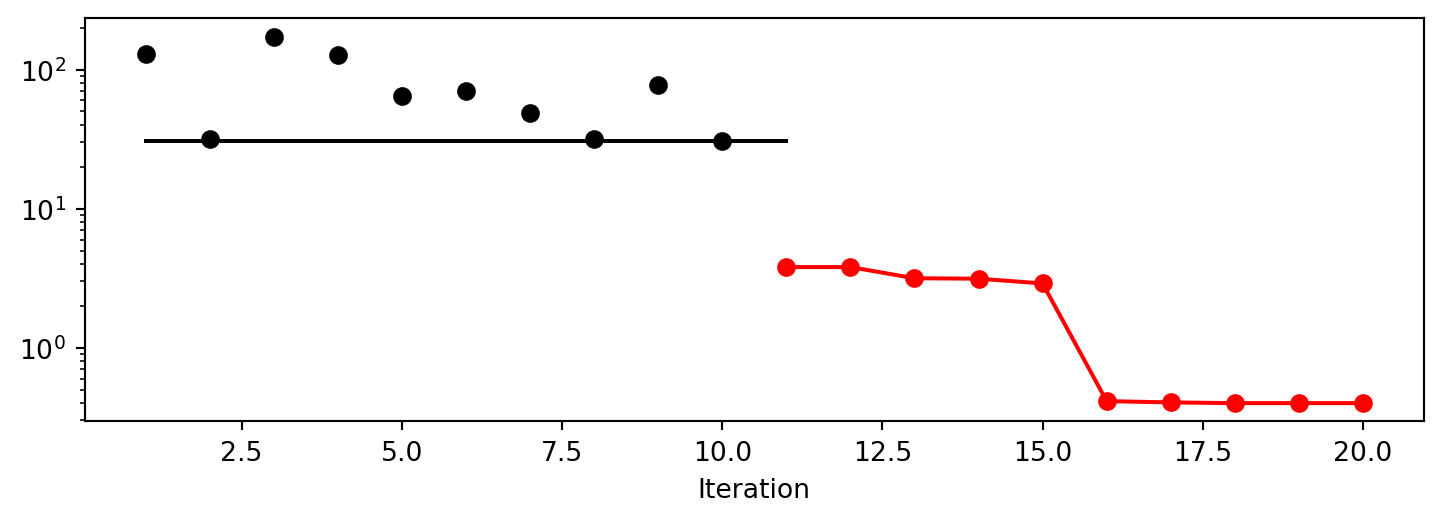

In [7]:
spot_de.plot_progress(log_y=True)

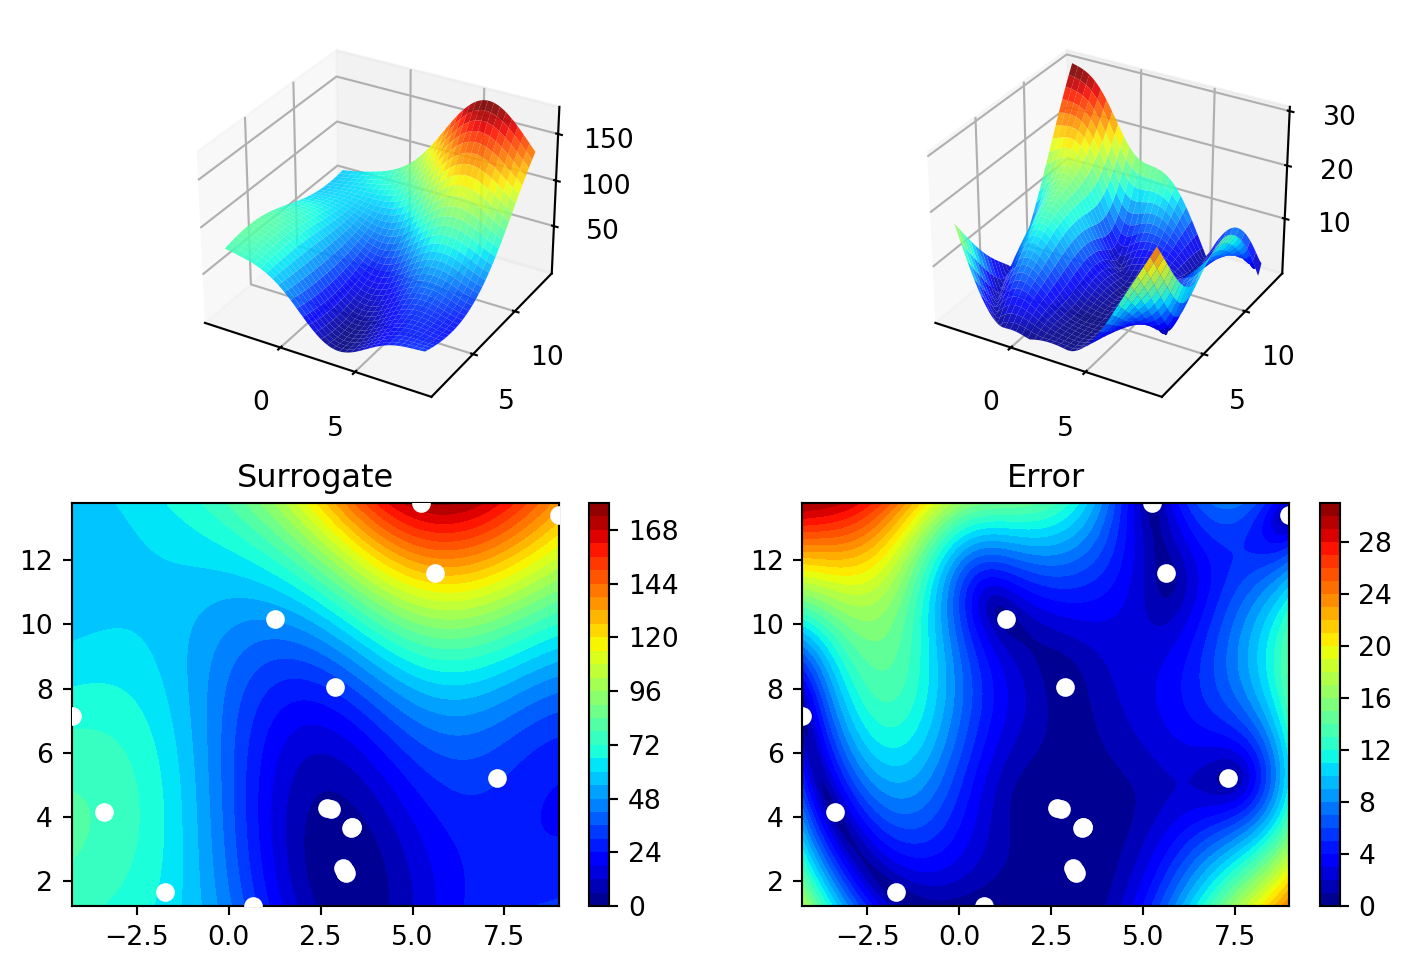

In [8]:
spot_de.surrogate.plot()

## Exercises


### `dual_annealing`

* Describe the optimization algorithm, see [scipy.optimize.dual_annealing](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.dual_annealing.html).
* Use the algorithm as an optimizer on the surrogate.

:::{.callout-tip}
##### Tip: Selecting the Optimizer for the Surrogate

We can run spotPython with the `dual_annealing` optimizer as follows:


spotPython tuning: 3.800452934057194 [######----] 55.00% 


spotPython tuning: 3.800452934057194 [######----] 60.00% 


spotPython tuning: 3.1590242778566413 [######----] 65.00% 


spotPython tuning: 3.1341475332648105 [#######---] 70.00% 


spotPython tuning: 2.8915909597236436 [########--] 75.00% 


spotPython tuning: 0.4195069442130439 [########--] 80.00% 


spotPython tuning: 0.401848680281649 [########--] 85.00% 


spotPython tuning: 0.3992571870039132 [#########-] 90.00% 


spotPython tuning: 0.3992571870039132 [##########] 95.00% 


spotPython tuning: 0.3992571870039132 [##########] 100.00% Done...



min y: 0.3992571870039132
x0: 3.150936988317143
x1: 2.2985561477641263


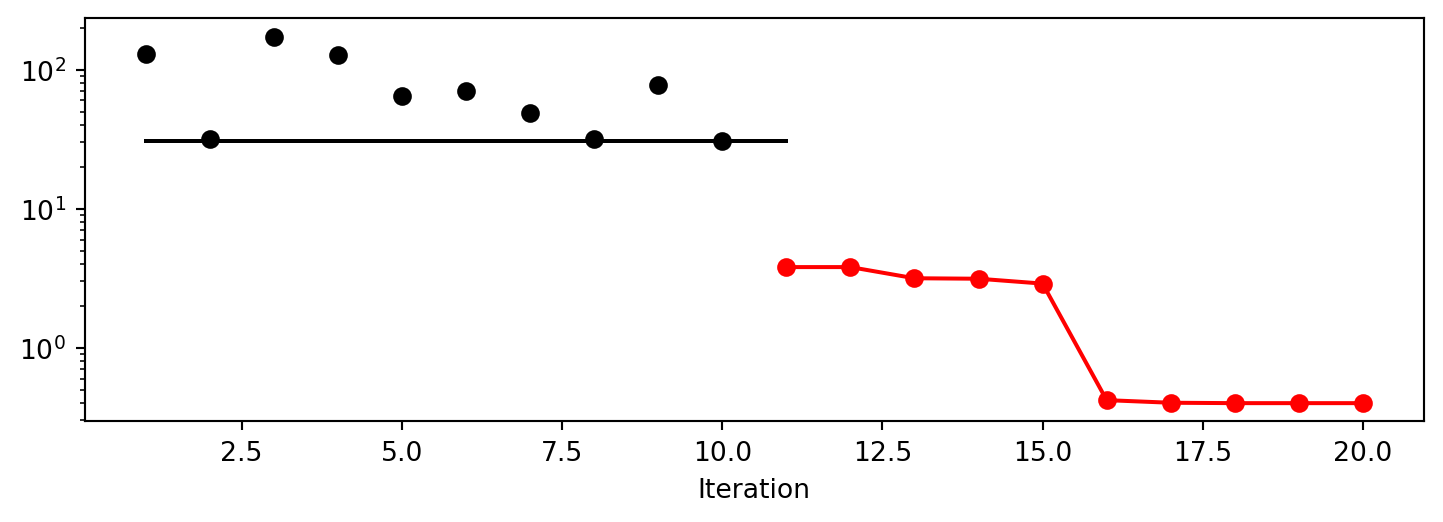

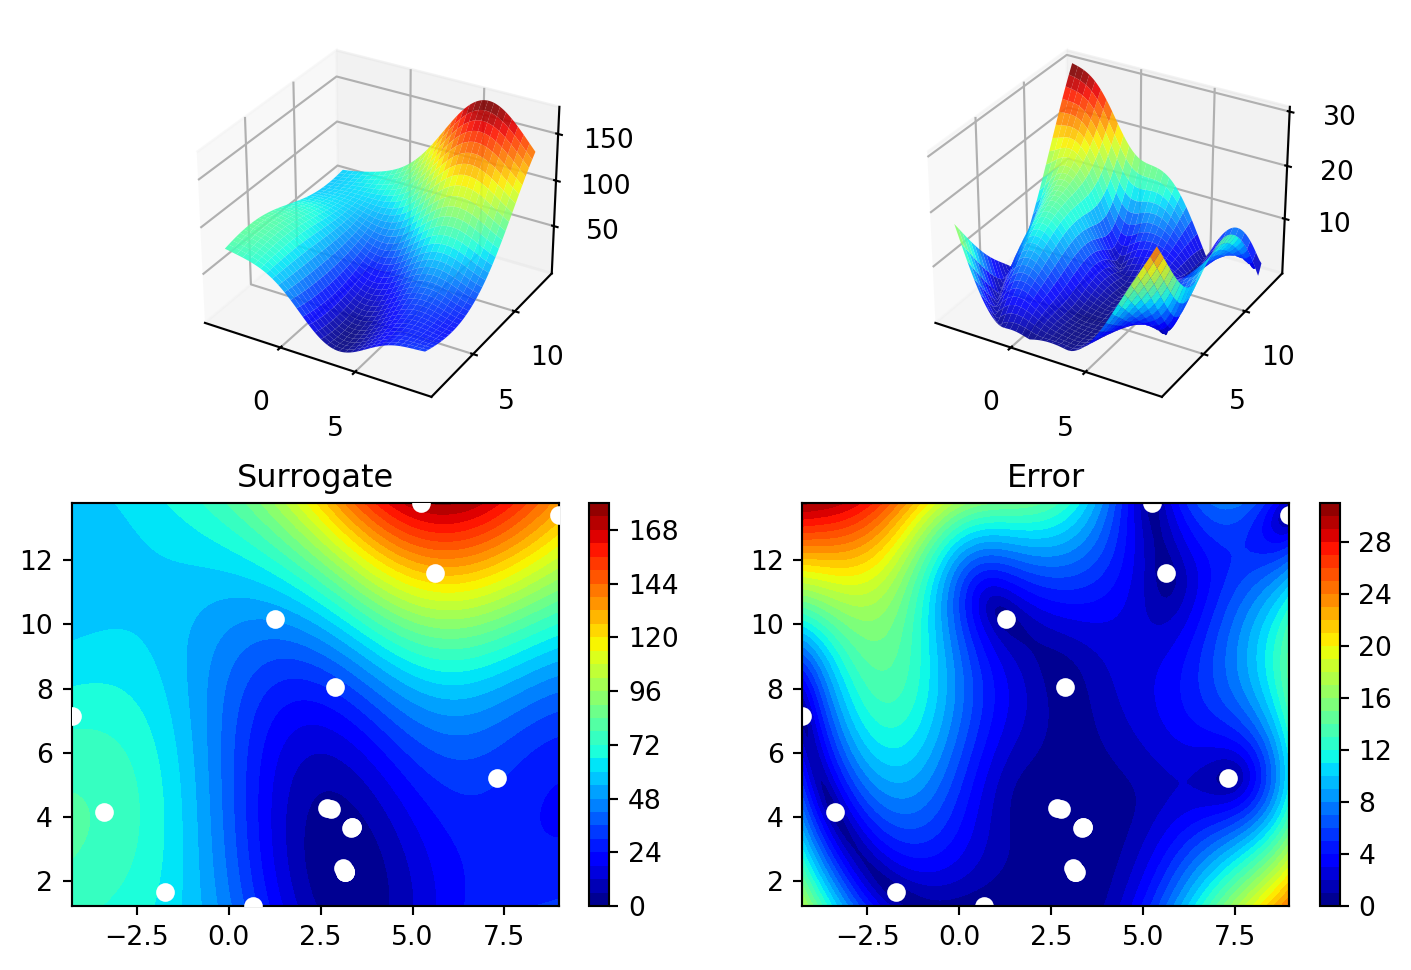

In [9]:
spot_da = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    optimizer=dual_annealing,
                    surrogate_control=surrogate_control)
spot_da.run()
spot_da.print_results()
spot_da.plot_progress(log_y=True)
spot_da.surrogate.plot()

:::


### `direct`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate

:::{.callout-tip}
##### Tip: Selecting the Optimizer for the Surrogate

We can run spotPython with the `direct` optimizer as follows:


spotPython tuning: 3.812970247994418 [######----] 55.00% 


spotPython tuning: 3.812970247994418 [######----] 60.00% 


spotPython tuning: 3.162514679816068 [######----] 65.00% 


spotPython tuning: 3.1189615135325983 [#######---] 70.00% 


spotPython tuning: 2.6597698275013 [########--] 75.00% 


spotPython tuning: 0.3984917773445744 [########--] 80.00% 


spotPython tuning: 0.3984917773445744 [########--] 85.00% 


spotPython tuning: 0.3984917773445744 [#########-] 90.00% 


spotPython tuning: 0.3984917773445744 [##########] 95.00% 


spotPython tuning: 0.3984917773445744 [##########] 100.00% Done...



min y: 0.3984917773445744
x0: 3.1378600823045257
x1: 2.3010973936899863


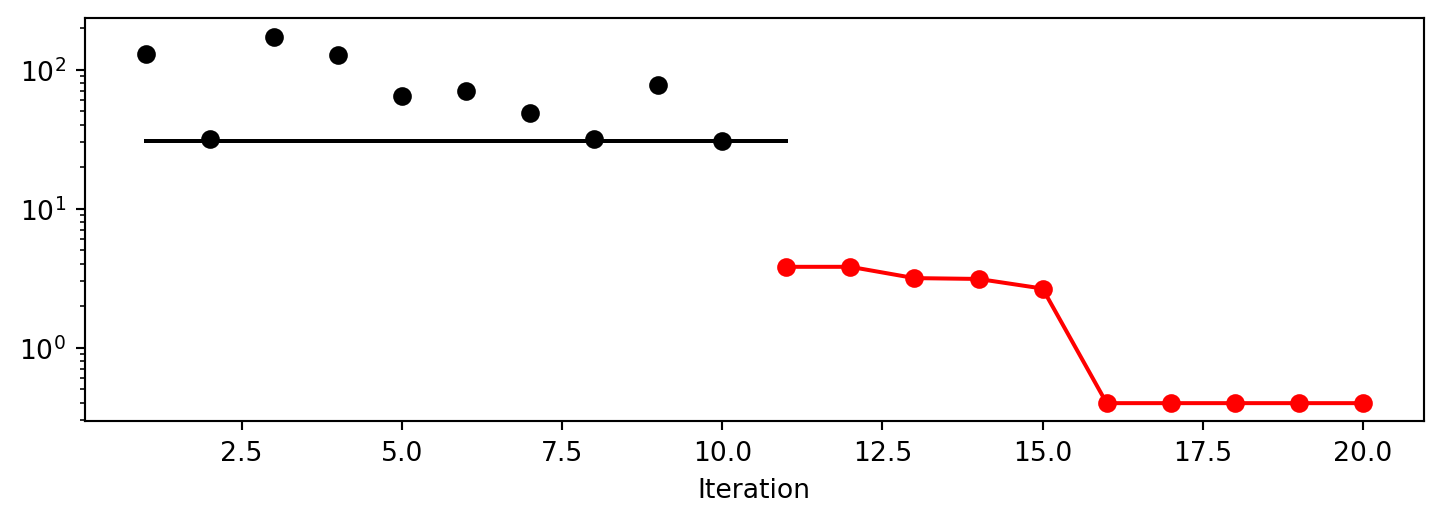

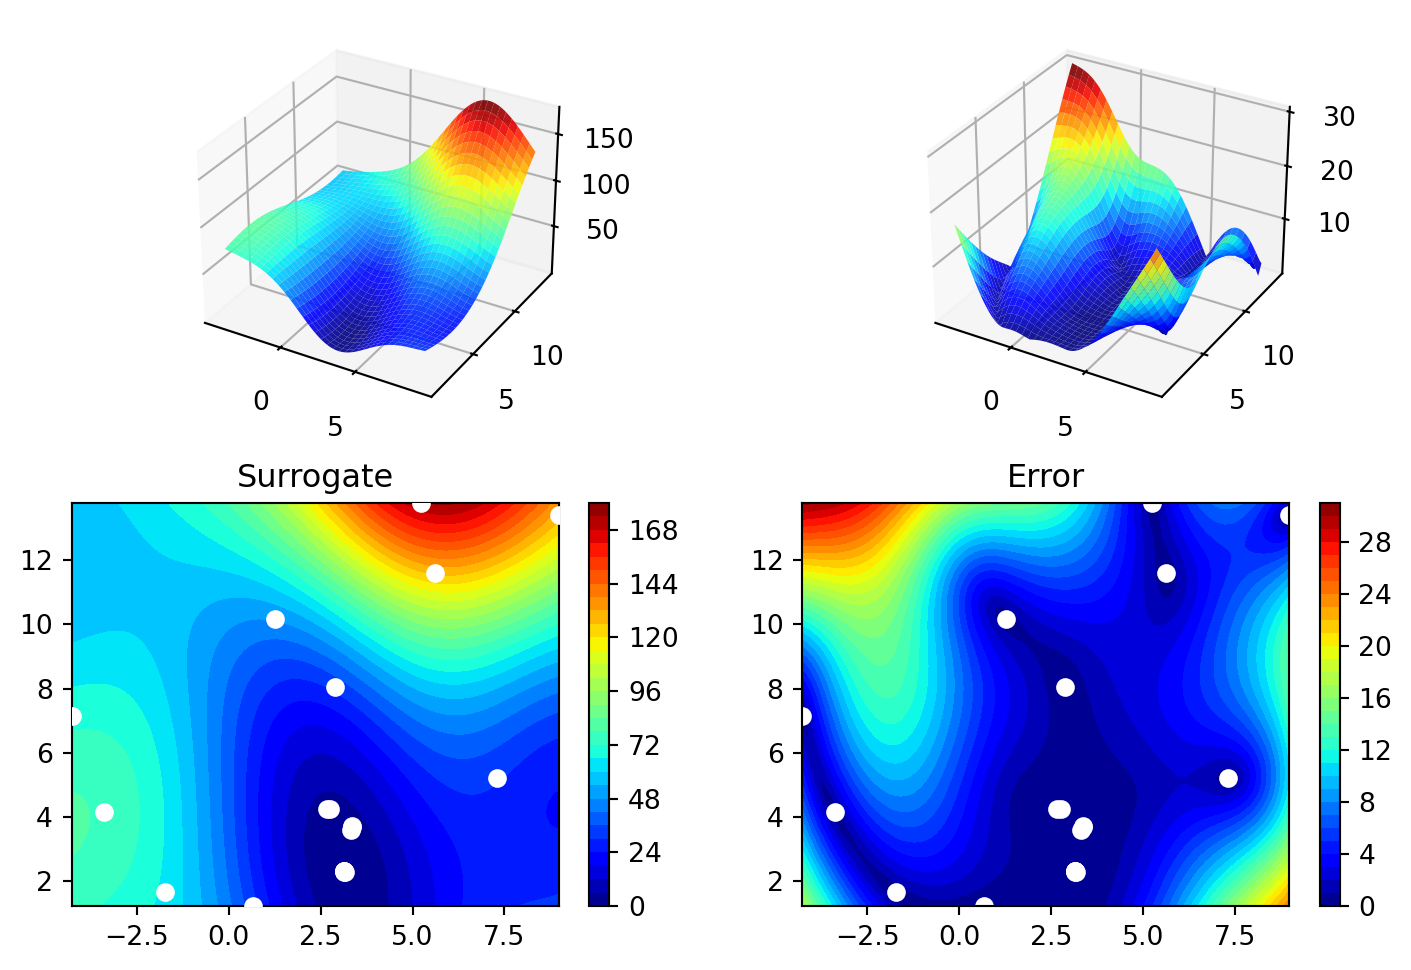

In [10]:
spot_di = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    optimizer=direct,
                    surrogate_control=surrogate_control)
spot_di.run()
spot_di.print_results()
spot_di.plot_progress(log_y=True)
spot_di.surrogate.plot()

:::

### `shgo`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate

:::{.callout-tip}
##### Tip: Selecting the Optimizer for the Surrogate

We can run spotPython with the `direct` optimizer as follows:


spotPython tuning: 3.8004552384813834 [######----] 55.00% 


spotPython tuning: 3.8004552384813834 [######----] 60.00% 


spotPython tuning: 3.1590504084857294 [######----] 65.00% 


spotPython tuning: 3.1341080537914 [#######---] 70.00% 


spotPython tuning: 2.8853849830561646 [########--] 75.00% 


spotPython tuning: 0.4239413355798014 [########--] 80.00% 


spotPython tuning: 0.4016765366794104 [########--] 85.00% 


spotPython tuning: 0.3993233052368623 [#########-] 90.00% 


spotPython tuning: 0.3993233052368623 [##########] 95.00% 


spotPython tuning: 0.3993233052368623 [##########] 100.00% Done...



min y: 0.3993233052368623
x0: 3.1514683455618786
x1: 2.2984189502295536


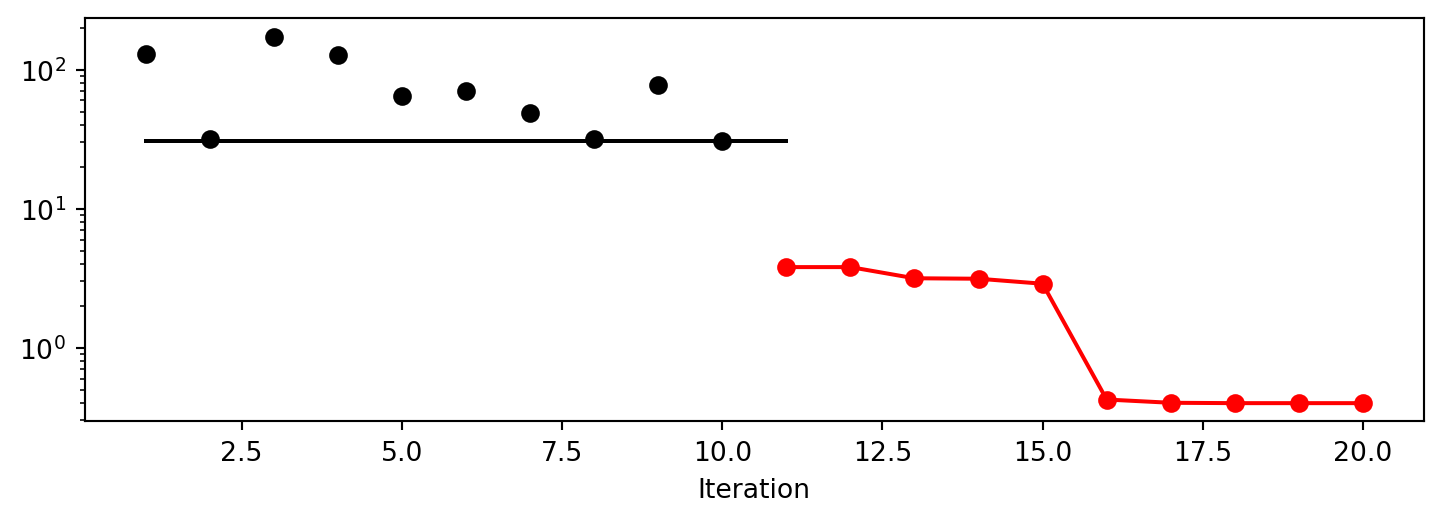

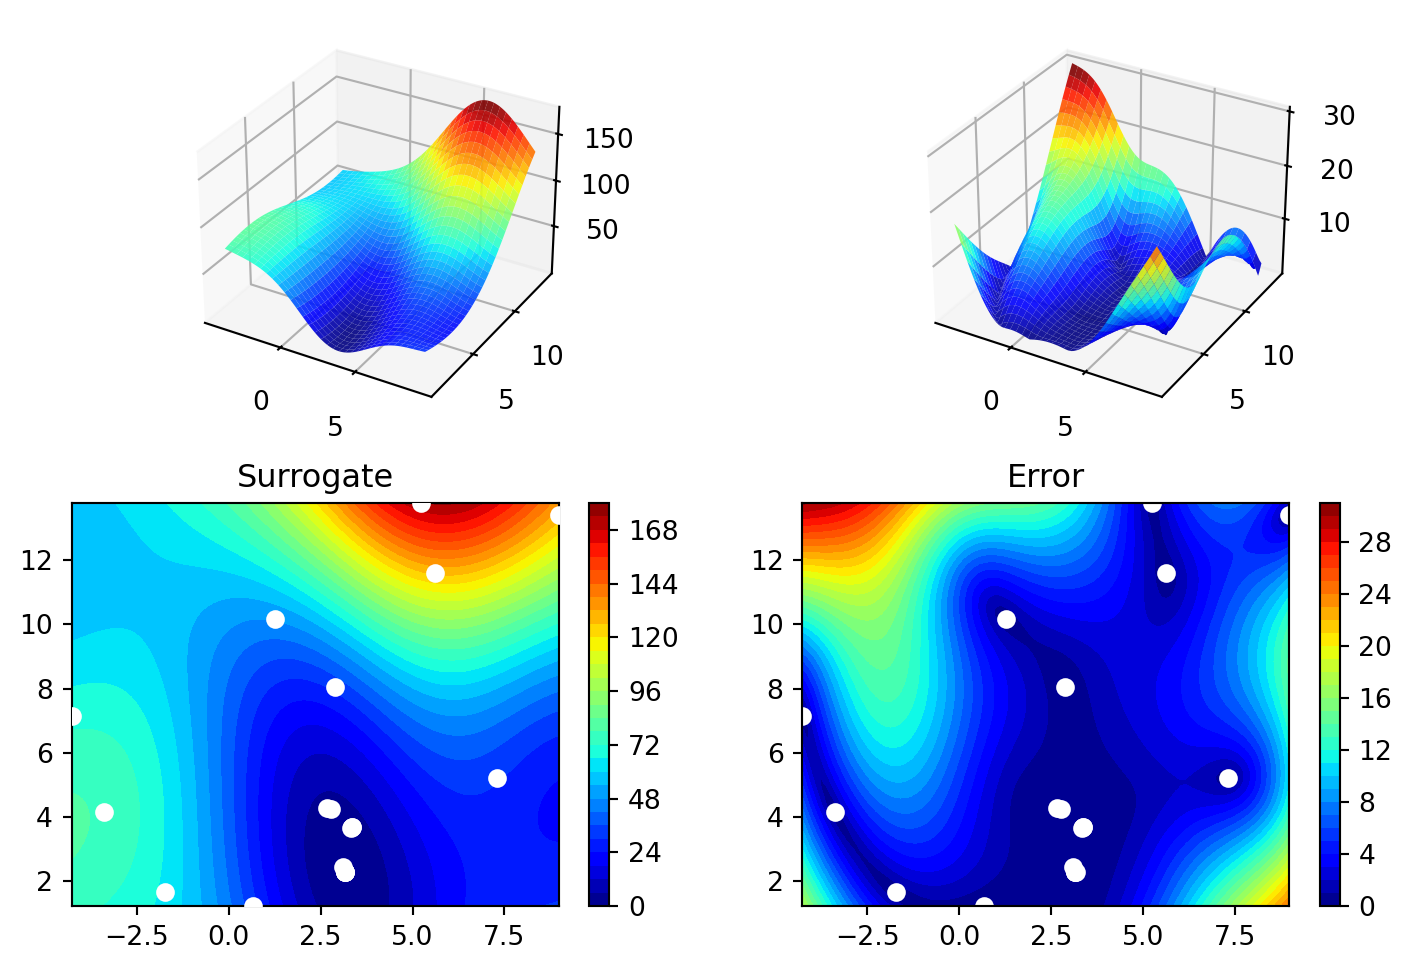

In [11]:
spot_sh = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    optimizer=shgo,
                    surrogate_control=surrogate_control)
spot_sh.run()
spot_sh.print_results()
spot_sh.plot_progress(log_y=True)
spot_sh.surrogate.plot()

:::



### `basinhopping`

* Describe the optimization algorithm
* Use the algorithm as an optimizer on the surrogate

:::{.callout-tip}
##### Tip: Selecting the Optimizer for the Surrogate

We can run spotPython with the `direct` optimizer as follows:


spotPython tuning: 3.80045375093536 [######----] 55.00% 


spotPython tuning: 3.80045375093536 [######----] 60.00% 


spotPython tuning: 3.159009257538889 [######----] 65.00% 


spotPython tuning: 3.1341512916720102 [#######---] 70.00% 


spotPython tuning: 2.8796407604155867 [########--] 75.00% 


spotPython tuning: 0.414633458827506 [########--] 80.00% 


spotPython tuning: 0.40117926479755717 [########--] 85.00% 


spotPython tuning: 0.3993792812618935 [#########-] 90.00% 


spotPython tuning: 0.3993792812618935 [##########] 95.00% 


spotPython tuning: 0.3993792812618935 [##########] 100.00% Done...



min y: 0.3993792812618935
x0: 3.150848989866496
x1: 2.3006645011798197


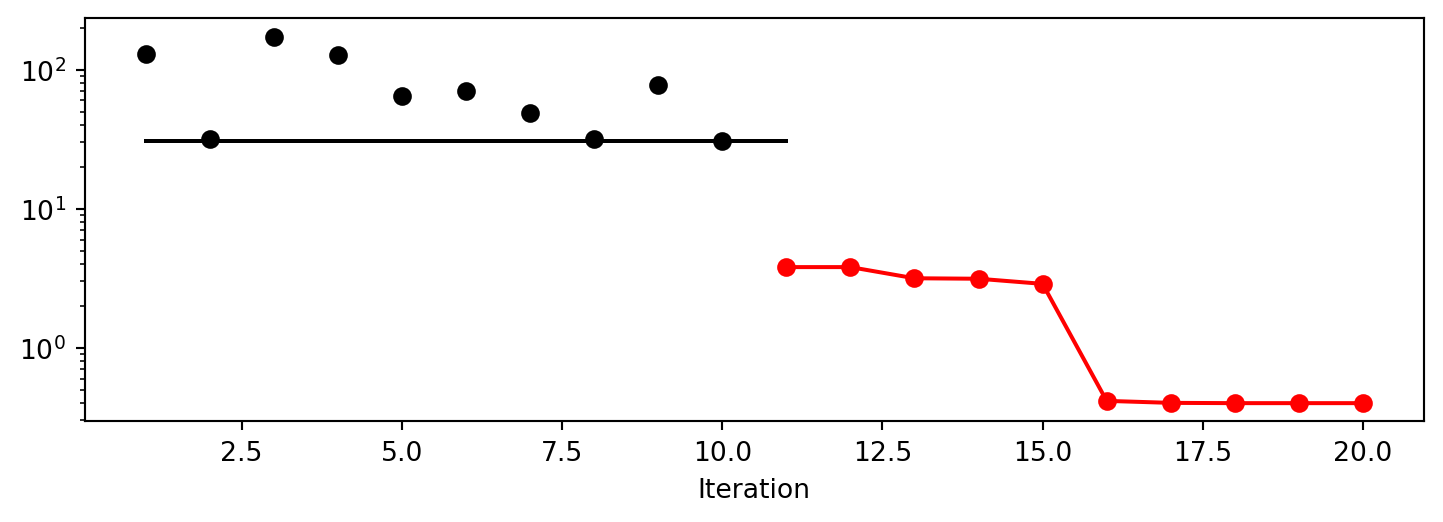

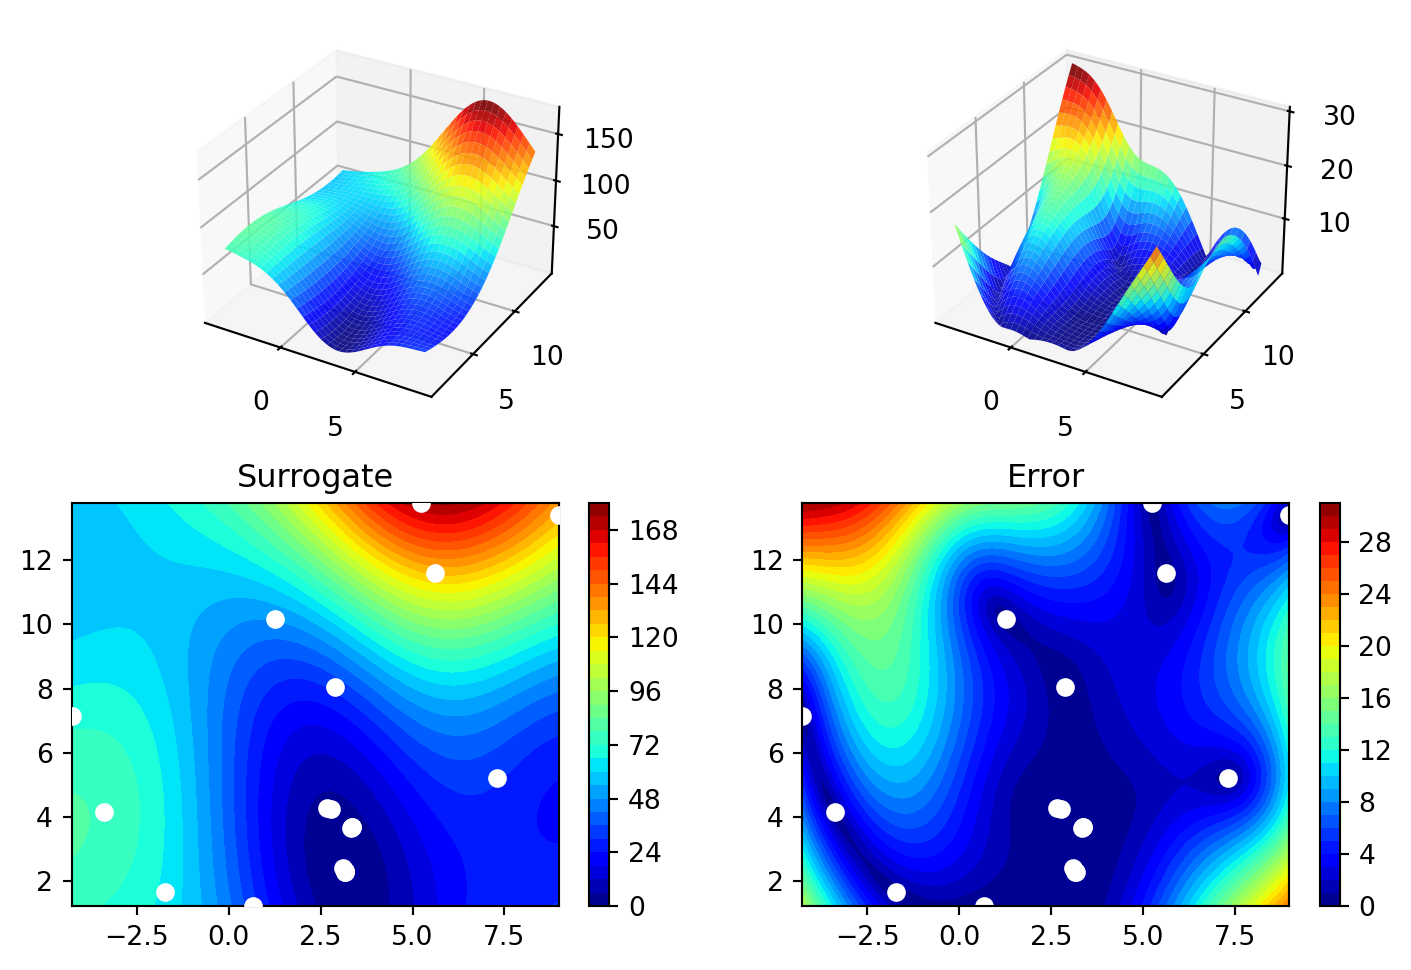

In [12]:
spot_bh = spot.Spot(fun=fun,
                    fun_control=fun_control,
                    optimizer=basinhopping,
                    surrogate_control=surrogate_control)
spot_bh.run()
spot_bh.print_results()
spot_bh.plot_progress(log_y=True)
spot_bh.surrogate.plot()

:::


### Performance Comparison

Compare the performance and run time of the 5 different optimizers:

  * `differential_evolution`
  * `dual_annealing`
  *  `direct`
  * `shgo`
  * `basinhopping`.

The Branin function has three global minima:

* $f(x) = 0.397887$  at 
  * $(-\pi, 12.275)$, 
  * $(\pi, 2.275)$, and 
  * $(9.42478, 2.475)$.    
* Which optima are found by the optimizers?
* Does the `seed` argument in `fun = analytical(seed=123).fun_branin` change this behavior?

## Jupyter Notebook

:::{.callout-note}

* The Jupyter-Notebook of this chapter is available on GitHub in the [Hyperparameter-Tuning-Cookbook Repository](https://github.com/sequential-parameter-optimization/Hyperparameter-Tuning-Cookbook/blob/main/004_spot_sklearn_optimization.ipynb)

:::